In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
import GCRCatalogs
from clmm import ShearAzimuthalAverager

### Read in the extragalactic catalog
- identify the most massive halo
- create a cluster dictionary (ra, dec, z)

In [2]:
extragalactic_cat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [3]:
stacked_gt = []
stacked_gterr = []

In [4]:
# get a massive halo at intermediate redshift
massive_halos = extragalactic_cat.get_quantities(['halo_mass', 'redshift','ra', 'dec'],\
                                                 filters=['halo_mass > 1e14','halo_mass < 125892541179416.62','is_central==True','redshift>0.3','redshift<0.35'])

mass_list = massive_halos['halo_mass']
select = (mass_list == mass_list)


In [5]:
# get a massive halo at intermediate redshift
#massive_halos = extragalactic_cat.get_quantities(['halo_mass', 'redshift','ra', 'dec'],\
 #                                                filters=['halo_mass > 5e14','is_central==True','redshift<0.4'])

#mass_list = massive_halos['halo_mass']
#select = (mass_list == mass_list)

i = 1
for i in range(len(select)):
    
    print(i)
    ra_cl = massive_halos['ra'][select][i]
    dec_cl = massive_halos['dec'][select][i]
    z_cl = massive_halos['redshift'][select][i]
    mass_cl = mass_list[select][i]

    print("mass = ", mass_cl/1e14,"*1e14 Msol", "\n ra = ", ra_cl, "\n dec = ", dec_cl,"\n z = ", z_cl)

    # make a dictionary for cluster
    cl_dict = {'z':z_cl, 'ra':ra_cl, 'dec': dec_cl}
    
    # get galaxies around it
    ra_min, ra_max = ra_cl-0.3, ra_cl+0.3
    dec_min, dec_max = dec_cl-0.3, dec_cl+0.3
    z_min = z_cl + 0.1
    z_max = 1.5

    coord_filters = ['ra >= {}'.format(ra_min),'ra < {}'.format(ra_max),'dec >= {}'.format(dec_min),'dec < {}'.format(dec_max)]

    z_filters = ['redshift >= {}'.format(z_min),'redshift < {}'.format(z_max)]

    gal_cat = extragalactic_cat.get_quantities(['galaxy_id', 'ra', 'dec', 'shear_1', 'shear_2', 'shear_2_phosim', 'shear_2_treecorr',\
                                            'redshift', 'convergence'], filters=(coord_filters + z_filters))

    # store the results into an astropy table
    dat = Table([gal_cat['galaxy_id'],gal_cat['ra'],gal_cat['dec'],gal_cat['shear_1'],\
          gal_cat['shear_2'],gal_cat['redshift'],gal_cat['convergence']], \
          names=('id','ra','dec', 'gamma1', 'gamma2', 'z', 'kappa'))

    print ("number of galaxies selected = ", len(dat))
    
    
    # create an object, given cluster dictionary and galaxy astropy table
    saa = ShearAzimuthalAverager(cl_dict,dat)
    # compute tangential and cross shear for each galaxy
    saa.compute_shear()
    # make the binned profile
    bins = np.linspace(0.1,10)
    binned_profile = saa.make_shear_profile(bins=bins)

    stacked_gt.append(binned_profile['g_t'])
    stacked_gterr.append(binned_profile['g_t_err']) 

0
mass =  1.074492072743662 *1e14 Msol 
 ra =  64.18873612123166 
 dec =  -39.68780413277255 
 z =  0.3395830652891523
number of galaxies selected =  443458


/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/astropy/table/row.py:65: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


read g1, g2 directly


/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2917: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1
mass =  1.06224943104 *1e14 Msol 
 ra =  63.91943801550073 
 dec =  -41.698931058314194 
 z =  0.33512327088586336
number of galaxies selected =  415294
read g1, g2 directly
2
mass =  1.058194543341972 *1e14 Msol 
 ra =  69.69666762324073 
 dec =  -42.94997772427642 
 z =  0.31419019612826826
number of galaxies selected =  319617
read g1, g2 directly
3
mass =  1.0916213739808451 *1e14 Msol 
 ra =  68.368691372601 
 dec =  -44.45895572201655 
 z =  0.31397281823785295
number of galaxies selected =  405710
read g1, g2 directly
4
mass =  1.13606918144 *1e14 Msol 
 ra =  68.54517686354546 
 dec =  -44.35041916292372 
 z =  0.3117652953385337
number of galaxies selected =  404835
read g1, g2 directly
5
mass =  1.1556158195740844 *1e14 Msol 
 ra =  66.90461276350621 
 dec =  -45.279033062083556 
 z =  0.32970929417898986
number of galaxies selected =  375405
read g1, g2 directly
6
mass =  1.0649786823752112 *1e14 Msol 
 ra =  64.8976505179622 
 dec =  -33.196585062464436 
 z =  0.333708335

# LET'S STACK !!!

### Eq 34 in https://arxiv.org/pdf/1802.09696.pdf

$w(z_l,z_s) \gamma_T(\theta,z_s)$

/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


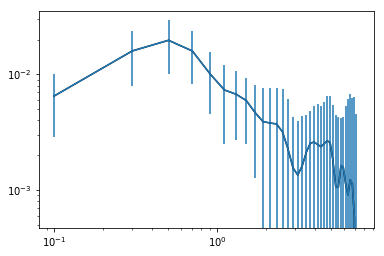

In [7]:
plt.plot(bins[:-1],np.nanmean(stacked_gt,axis=0),'k')
plt.errorbar(bins[:-1],np.nanmean(stacked_gt,axis=0),yerr=np.nanstd(stacked_gt,axis=0))
#np.shape(bins)
plt.xscale('log')
plt.yscale('log')
#plt.plot(r_phys, gt_mod,label='expected profile')

In [21]:
import sys
sys.path.append('../models/')
import clmm.models.CLMM_densityModels_beforeConvertFromPerH as dallas
import colossus.cosmology.cosmology as Cosmology
import time

zL = np.mean(massive_halos['redshift'])
chooseCosmology = 'WMAP7-ML' #Choose cosmology used
cosmo = Cosmology.setCosmology(chooseCosmology)

mdef = '200c'
M = np.mean(mass_list)*cosmo.h
c = 3.
r = np.linspace(0.1, 10., 100) #Mpc
r = r*cosmo.h #Mpc/h

testProf= dallas.nfwProfile(M = M, c = c, zL = zL, mdef = mdef, \
                        chooseCosmology = chooseCosmology, esp = None)


In [22]:
z_infty = 300
zL_arr = np.zeros(len(dat['z'])) + zL

In [23]:
D_LS = (cosmo.comovingDistance(z_min=0.,z_max=dat['z']) - cosmo.comovingDistance(z_min=0.,z_max=zL))/(1.+dat['z'])
D_Linfty = (cosmo.comovingDistance(z_min=0., z_max=z_infty) - cosmo.comovingDistance(z_min=0., z_max=zL))/(1.+z_infty)
beta = D_LS * cosmo.angularDiameterDistance(z_infty)/cosmo.angularDiameterDistance(dat['z'])/D_Linfty

In [24]:
r_phys = r
gt_mod = np.zeros(r.size)

for i in range(r.size):
    gamtest_infty= testProf.deltaSigma(np.array([r[i]])*0.7)/testProf.Sc(z_infty)
    kappa_infty =  testProf.Sigma(np.array([r[i]])*0.7)/testProf.Sc(z_infty)
    gt_mod[i] = np.mean(beta * gamtest_infty/(1-beta*kappa_infty))

/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


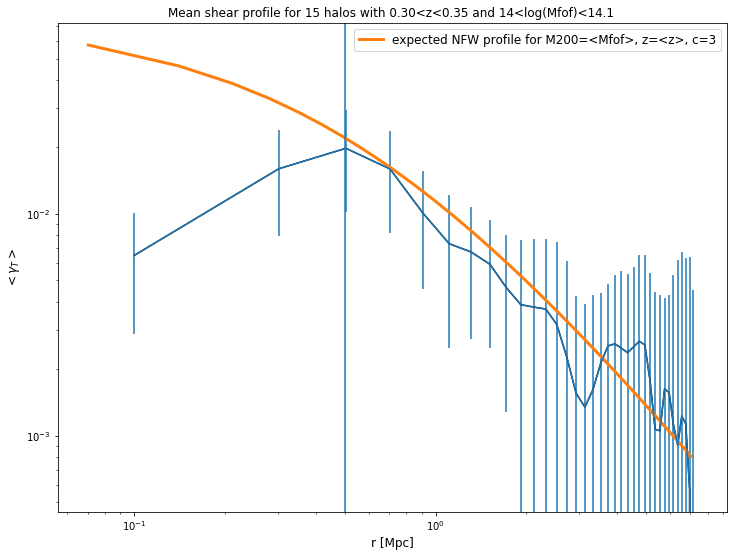

In [30]:
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
plt.plot(bins[:-1],np.nanmean(stacked_gt,axis=0),'k')
plt.errorbar(bins[:-1],np.nanmean(stacked_gt,axis=0),yerr=np.nanstd(stacked_gt,axis=0))
#np.shape(bins)
plt.xscale('log')
plt.yscale('log')
plt.plot(r, gt_mod,lw=3,label='expected NFW profile for M200=<Mfof>, z=<z>, c=3')

plt.xlabel('r [Mpc]',fontsize="large");
plt.ylabel('$<\\gamma_T>$',fontsize="large");
plt.legend(fontsize="large")
plt.title("Mean shear profile for 15 halos with 0.30<z<0.35 and 14<log(Mfof)<14.1 ")
plt.axvline(0.5)